🎯 Objetivo do EDA (Análise Exploratória)
Encontrar padrões que antecedem execuções com status = "Erro", para futuramente treinar um modelo de predição.

🔍 Etapas da EDA Guiada
1. Visualização inicial do dataset
Verificar tipos de dados, nulos, outliers.

2. Distribuição do status
Quantas execuções são Erro?

Comparar com outros status.

3. Foco em Erro:
Quais entidades mais erram?

Há dias ou horários onde Erro é mais comum?

Servidores específicos que concentram erros?

Categorias mais sensíveis?

4. Comparar Erro vs Sucesso
Tempo médio de execução

Distribuição por horário

Correlação entre variáveis

📦 1. Importar e carregar os dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('C:/PythonProjects/diagnosticoentidades/data/processed/execucoes_exportadas.csv', parse_dates=['data_execucao'])
df["data_execucao"] = pd.to_datetime(df["data_execucao"])
df["hora"] = df["data_execucao"].dt.hour
df["dia_semana"] = df["data_execucao"].dt.day_name()

📊 2. Visão geral

In [ ]:
df.info()
df["status_execucao"].value_counts()
df["nome_entidade"].value_counts()

📉 3. Quantidade de erros por entidade

In [ ]:
erros_por_entidade = df[df["status_execucao"] == "Erro"]["nome_entidade"].value_counts()
erros_por_entidade.head(10).plot(kind='barh', title="Top 10 entidades com mais erros")
plt.xlabel("Nº de erros")
plt.show()

📆 4. Erros por dia da semana e hora

In [ ]:
erro = df[df["status_execucao"] == "Erro"]

# Dia da semana
erro["dia_semana"].value_counts().plot(kind="bar", title="Erros por dia da semana")
plt.ylabel("Erros")
plt.show()

# Hora
erro["hora"].value_counts().sort_index().plot(kind="bar", title="Erros por hora do dia")
plt.ylabel("Erros")
plt.xlabel("Hora")
plt.show()

🧮 5. Tempo médio de execução comparando status

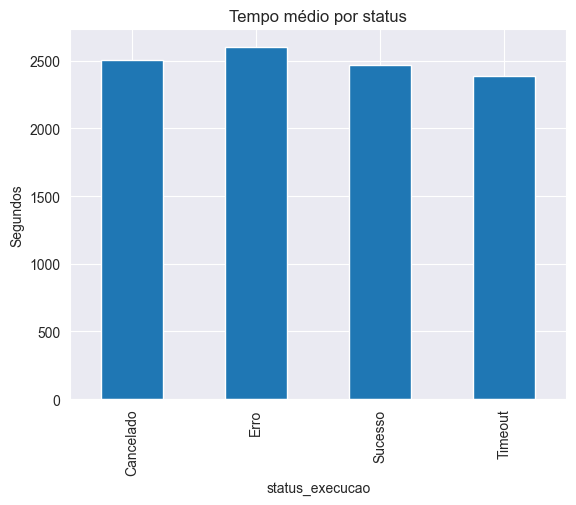

In [8]:
df.groupby("status_execucao")["tempo_execucao_seg"].mean().plot(kind="bar", title="Tempo médio por status")
plt.ylabel("Segundos")
plt.show()

🧠 6. Correlações e boxplots (Erro x outras variáveis)

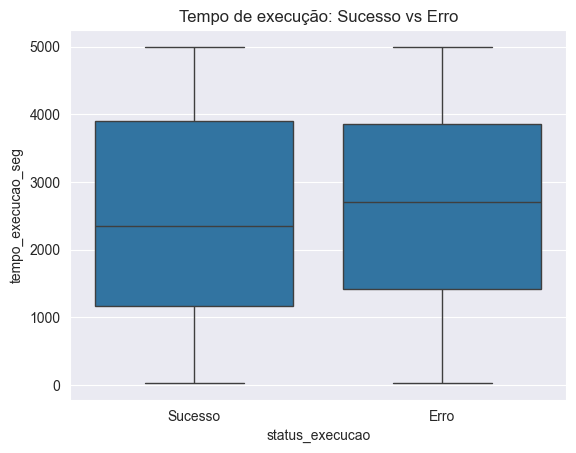

In [9]:
sns.boxplot(data=df[df["status_execucao"].isin(["Sucesso", "Erro"])],
            x="status_execucao", y="tempo_execucao_seg")
plt.title("Tempo de execução: Sucesso vs Erro")
plt.show()